## Autoencoder Tutorial: MNIST Digit Reconstruction
This notebook demonstrates how to implement and train a basic autoencoder on the MNIST dataset. Autoencoders are useful for learning compressed representations of data and reconstructing inputs.

### 1. Data Loading and Preprocessing
We begin by loading the MNIST dataset, which contains 70,000 grayscale images of handwritten digits. The images are normalized to the [0, 1] range and flattened to vectors of size 784 (28×28 pixels).

### 2. Building the Autoencoder
The autoencoder consists of two parts:
- **Encoder**: Compresses the input into a smaller latent space.
- **Decoder**: Reconstructs the original input from the latent representation.

In this example, we use a shallow architecture with Dense layers and ReLU/Sigmoid activations.

### 3. Model Training
We use binary crossentropy as the loss function and the Adam optimizer. The model is trained for 20 epochs with a batch size of 256. The objective is to minimize reconstruction error between the input and output.

### 4. Visualizing Reconstructions
After training, we pass test images through the encoder and decoder to visualize how well the model can reconstruct digits from the compressed latent space.

### 5. Denoising Autoencoder
To demonstrate the robustness of autoencoders, we can add Gaussian noise to the input images and train the model to recover the clean version. This is useful in real-world applications like image denoising.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize to range [0, 1] and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Size of encoded representation
encoding_dim = 64

# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Reconstruction
decoded = Dense(784, activation='sigmoid')(encoded)

# Model that maps input to reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [4]:
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3494 - val_loss: 0.1630
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1536 - val_loss: 0.1282
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1238 - val_loss: 0.1080
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1062 - val_loss: 0.0968
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0959 - val_loss: 0.0894
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0890 - val_loss: 0.0846
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0846 - val_loss: 0.0814
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0816 - val_loss: 0.0791
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0795 - val_loss: 0.0776
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0780 - val_loss: 0.0764
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0771 - val_loss: 0.0756
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


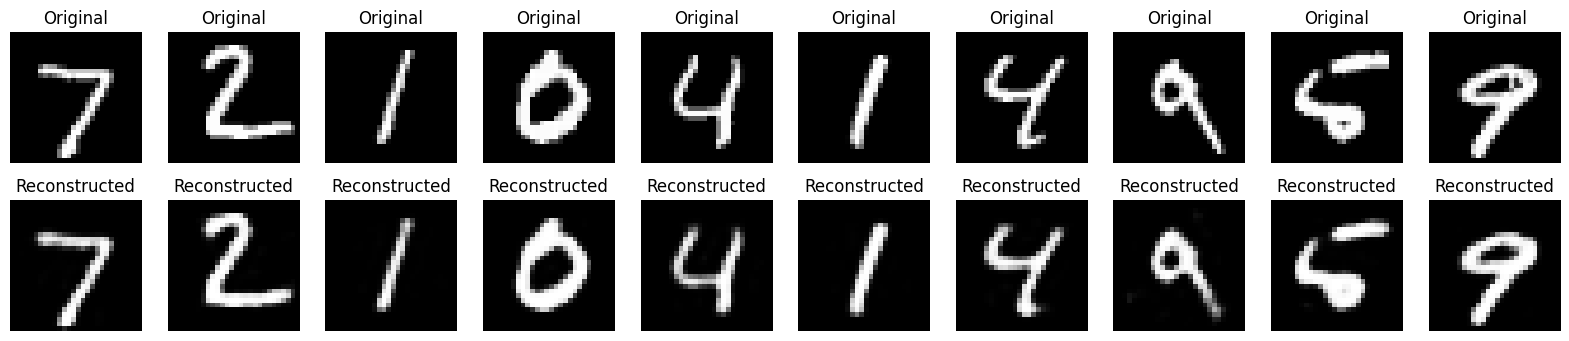

In [5]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # how many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1535 - val_loss: 0.1207
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1202 - val_loss: 0.1164
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1163 - val_loss: 0.1142
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1144 - val_loss: 0.1133
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1133 - val_loss: 0.1126
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1126 - val_loss: 0.1121
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1121 - val_loss: 0.1116
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1118 - val_loss: 0.1115
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1116 - val_loss: 0.1114
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1115 - val_loss: 0.1114
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


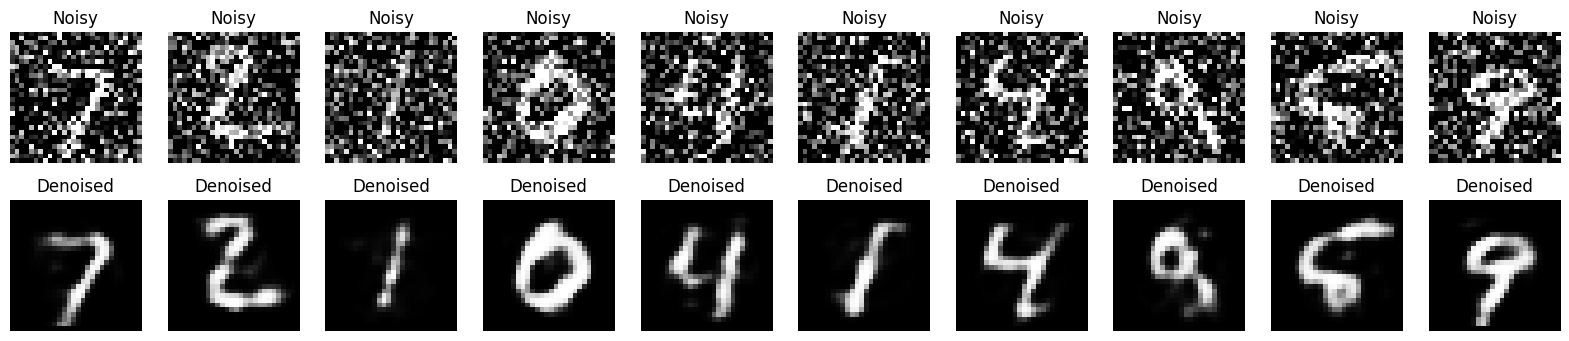

In [6]:
# Add noise to the inputs
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train on noisy input, but predict clean output
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Predict denoised images
denoised_imgs = autoencoder.predict(x_test_noisy)

# Display noisy vs denoised
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()